In [1]:
# import the library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from xgboost import XGBClassifier

In [2]:
# import the data
data = pd.read_csv("20240117_churn_data.csv")

C:\Users\Bao\AppData\Local\Temp\ipykernel_29168\1829302250.py:2: DtypeWarning: Columns (22,47,49,51,53,55) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("20240117_churn_data.csv")


In [3]:

data.columns

Index(['policy_nr_hashed', 'years_since_policy_started',
       'year_initiation_policy', 'year_initiation_policy_version',
       'year_end_policy', 'd_churn', 'd_churn_cancellation',
       'd_churn_between_prolongations', 'd_churn_around_prolongation',
       'premium_main_coverages', 'premium_supplementary_coverages',
       'total_premium', 'welcome_discount', 'welcome_discount_control_group',
       'customer_age', 'accident_free_years', 'car_value', 'age_car', 'brand',
       'type', 'weight', 'fuel_type', 'postcode', 'product', 'allrisk basis',
       'allrisk compleet', 'allrisk royaal', 'wa-extra',
       'wettelijke aansprakelijkheid', 'n_main_coverages',
       'n_supplementary_coverages', 'n_coverages', 'sales_channel',
       'mutation_1', 'premium_change_mutation_1', 'mutation_2',
       'premium_change_mutation_2', 'mutation_3', 'premium_change_mutation_3',
       'mutation_4', 'premium_change_mutation_4', 'mutation_5',
       'premium_change_mutation_5', 'mutation_6', 

In [4]:

data_after2018 = data[(data['year_initiation_policy'] >= 2018)&(data['year_initiation_policy'] <2023)]
len(data_after2018)

169069

In [5]:
# split the data into different groups
dfs_by_discount = {
   accepted: sub_df
   for accepted, sub_df in data_after2018.groupby("welcome_discount_control_group")
}

year_initiation_policy
2018     2153
2019     3541
2020     5942
2021     9792
2022    16187
Name: policy_nr_hashed, dtype: int64
Key: WD and LPA number of ploicy numbers 37615


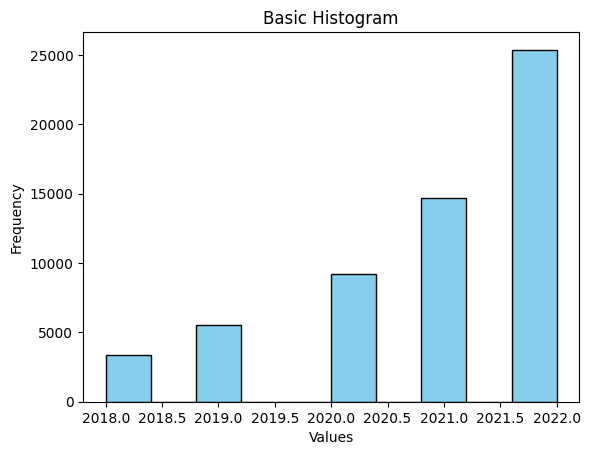

year_initiation_policy
2018      148
2019      310
2020      453
2021    11306
2022     7153
Name: policy_nr_hashed, dtype: int64
Key: WD and no LPA number of ploicy numbers 19370


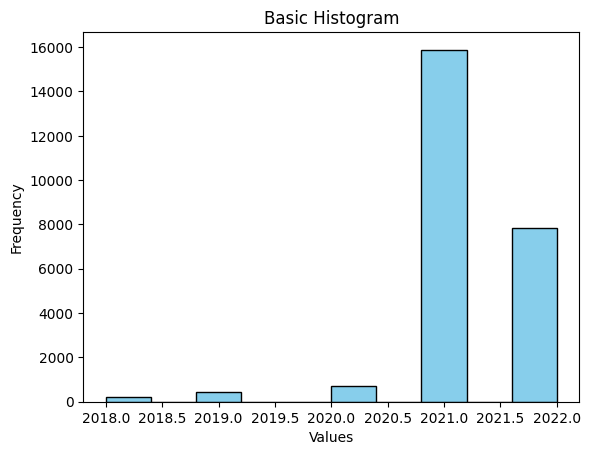

year_initiation_policy
2018    233
2019    385
2020    643
2021    909
2022    998
Name: policy_nr_hashed, dtype: int64
Key: no WD and LPA number of ploicy numbers 3168


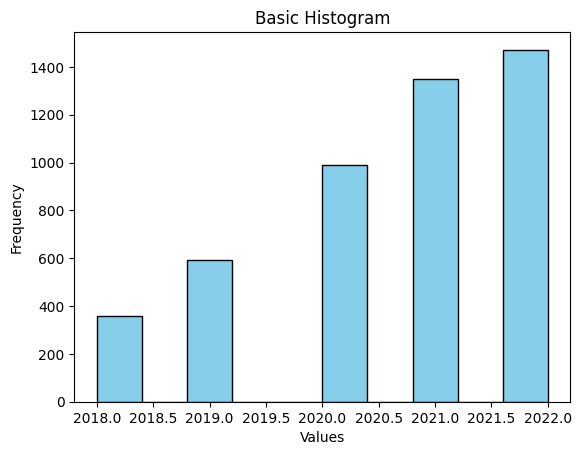

year_initiation_policy
2018     5478
2019     8385
2020    11424
2021     5502
2022     2390
Name: policy_nr_hashed, dtype: int64
Key: no WD and no LPA number of ploicy numbers 33179


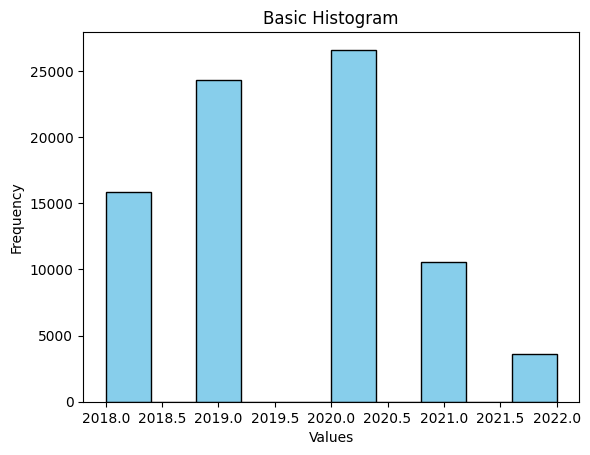

In [6]:
for key in dfs_by_discount.keys():
    print(dfs_by_discount[key].groupby('year_initiation_policy')['policy_nr_hashed'].nunique())
    print("Key:", key, "number of ploicy numbers" , dfs_by_discount[key]['policy_nr_hashed'].nunique())
    # Plotting a basic histogram
    plt.hist(dfs_by_discount[key]['year_initiation_policy'], color='skyblue', edgecolor='black')
     
    # Adding labels and title
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Basic Histogram')
     
    # Display the plot
    plt.show()

In [7]:
dfs_with_discount = data_after2018[data_after2018['welcome_discount'] != 1]
dfs_without_discount = data_after2018[data_after2018['welcome_discount'] == 1]


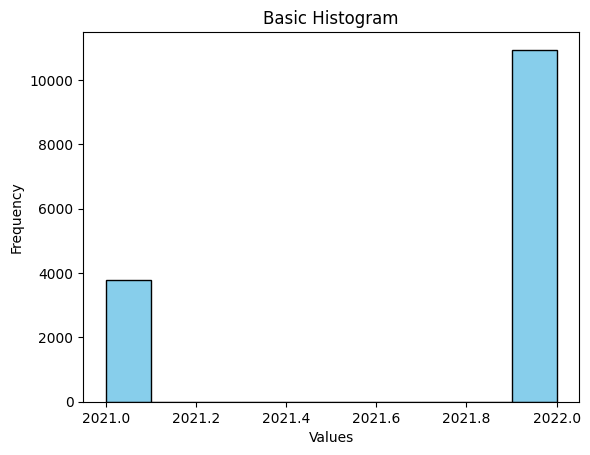

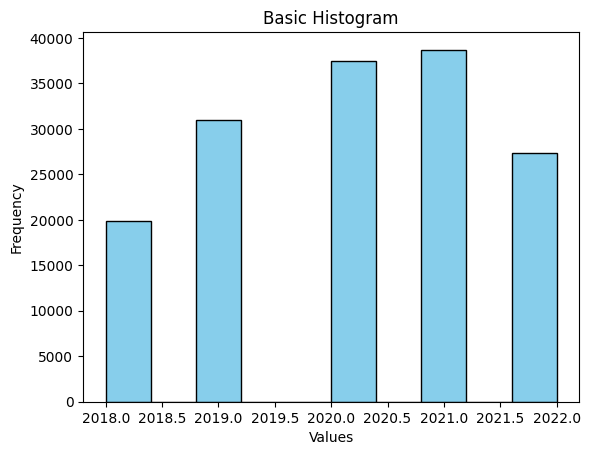

In [8]:

plt.hist(dfs_with_discount['year_initiation_policy'], color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
     
# Display the plot
plt.show()

plt.hist(dfs_without_discount['year_initiation_policy'], color='skyblue', edgecolor='black') 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
     
# Display the plot
plt.show()


In [9]:

count_of_0s = (dfs_without_discount['d_churn_between_prolongations'] == 0).sum()
count_of_1s = (dfs_without_discount['d_churn_between_prolongations'] == 1).sum()
print(count_of_0s)
print(count_of_1s)

142490
11854
